# C. Build a model for predicting the confirmed  and recovered on any dates 15th july2020


In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns 
import pandas as pd  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



In [4]:
dataset_Covid19 = pd.read_csv(r'D:\python\Chandigarh_State1.csv')

dataset_Covid19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,19-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
1,2,20-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
2,3,21-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
3,4,22-03-2020,6:00 PM,Chandigarh,5,0,0,0,5
4,5,23-03-2020,6:00 PM,Chandigarh,6,0,0,0,6


In [5]:
X = dataset_Covid19.iloc[:,:-1].values 
y = dataset_Covid19.iloc[:,4].values 
dataset_Covid19.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,19-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
1,2,20-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
2,3,21-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
3,4,22-03-2020,6:00 PM,Chandigarh,5,0,0,0,5
4,5,23-03-2020,6:00 PM,Chandigarh,6,0,0,0,6


In [6]:
 dataset_Covid19.shape

(91, 9)

In [7]:
dataset_Covid19.describe()

,Sno,Cured,Deaths,Confirmed
count,91.00000,91.000000,91.000000,91.000000
mean,46.00000,78.307692,1.736264,132.065934
std,26.41338,103.383396,2.048496,123.869089
min,1.00000,0.000000,0.000000,1.000000
25%,23.50000,7.000000,0.000000,18.000000
50%,46.00000,19.000000,0.000000,94.000000
75%,68.50000,186.000000,3.000000,238.000000
max,91.00000,302.000000,6.000000,358.000000


In [8]:
 dataset_Covid19

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,19-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
1,2,20-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
2,3,21-03-2020,6:00 PM,Chandigarh,1,0,0,0,1
3,4,22-03-2020,6:00 PM,Chandigarh,5,0,0,0,5
4,5,23-03-2020,6:00 PM,Chandigarh,6,0,0,0,6
...,...,...,...,...,...,...,...,...,...
86,87,13-06-2020,8:00 AM,Chandigarh,-,-,286,5,334
87,88,14-06-2020,8:00 AM,Chandigarh,-,-,286,5,345
88,89,15-06-2020,8:00 AM,Chandigarh,-,-,293,5,352
89,90,16-06-2020,8:00 AM,Chandigarh,-,-,296,6,354


#  Predict the  Cured depending upon the Confirmed recorded.

In [25]:
X = dataset_Covid19['Confirmed'].values.reshape(-1,1)
y = dataset_Covid19['Cured'].values.reshape(-1,1)


In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[48.33457459]
[[1.10193721]]


In [28]:
y_pred = regressor.predict(X_test)

In [29]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,49.436512
1,0,65.965570
2,24,234.561963
3,17,110.043058
4,286,416.381602
5,9,71.475256
6,19,151.916672
7,17,110.043058
8,51,258.804582
9,302,442.828095


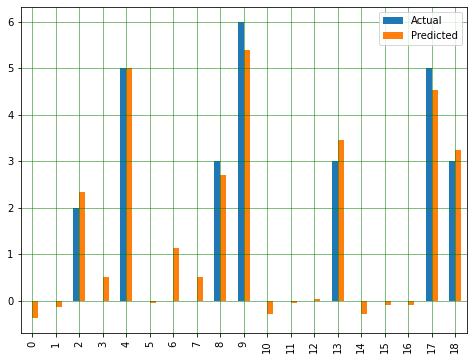

In [48]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#  Predict the  Deaths depending upon the Confirmed recorded.

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.24806520818431577

In [36]:
X = dataset_Covid19['Confirmed'].values.reshape(-1,1)
y = dataset_Covid19['Deaths'].values.reshape(-1,1)


In [37]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

[-0.39671874]
[[0.01618786]]


In [40]:
y_pred = regressor.predict(X_test)

In [41]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,-0.380531
1,0,-0.137713
2,2,2.339030
3,0,0.509801
4,5,5.010027
5,0,-0.056774
6,0,1.124940
7,0,0.509801
8,3,2.695163
9,6,5.398536


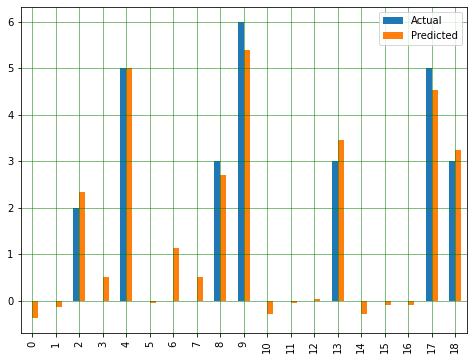

In [49]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9593049239459451